Carrying this further, the system of equations for a 2-dimensional VAR(3) model is:

&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \phi_{11,2}y_{1,t-2} + \phi_{12,2}y_{2,t-2} + \phi_{11,3}y_{1,t-3} + \phi_{12,3}y_{2,t-3} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \phi_{21,2}y_{1,t-2} + \phi_{22,2}y_{2,t-2} + \phi_{21,3}y_{1,t-3} + \phi_{22,3}y_{2,t-3} + \varepsilon_{2,t}$<br><br>

and the system of equations for a 3-dimensional VAR(2) model is:

&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \phi_{13,1}y_{3,t-1} + \phi_{11,2}y_{1,t-2} + \phi_{12,2}y_{2,t-2} + \phi_{13,2}y_{3,t-2} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \phi_{23,1}y_{3,t-1} + \phi_{21,2}y_{1,t-2} + \phi_{22,2}y_{2,t-2} + \phi_{23,2}y_{3,t-2} + \varepsilon_{2,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{3,t} = c_3 + \phi_{31,1}y_{1,t-1} + \phi_{32,1}y_{2,t-1} + \phi_{33,1}y_{3,t-1} + \phi_{31,2}y_{1,t-2} + \phi_{32,2}y_{2,t-2} + \phi_{33,2}y_{3,t-2} + \varepsilon_{3,t}$<br><br>

- We're going to explore how we can forecast into the future using vector auto regression for two time series data sets that we believe have effects on each other.

- So we'll be using M2 money, stock and the personal consumption data set both from Fred.

- we have how much people spend, how much money do people have.
- And it's not unreasonable to think that they can have an interaction term that goes either way.
- If people spend more, they probably have less money.
- If people have more money, maybe they're more likely to spend more.
- So there's probably some sort of relationship that goes both ways between these two time series.

Y1 = Personal Consumption Expenditures
Y2 = M2 Money Stock

&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \varepsilon_{2,t}$

- You could switch out which ones Y1 and Y2

- But essentially we have k=2 because we have two time series here that have some sort of relation to each other.

- What we need to figure out is what is the best value of P. through the code?


- Pyramid auto arima won't do the grid search for us, but we can easily run various p values through a loop and then check which model has the best AIC

- AIC will also punish model for being too complex, even if they perform slightly better on some other metric.
- So we expect to see a drop in AIC as p gets larger in our for loop and then at acertain point(lag order p value) an increasing AIC.

- We also need to manually check for stationary and difference the time series if they are not stationary, because we are not dealing with ARIMA, which has I term inbuilt
- So in the case of this lecture, we'll notice the Time series requires different difference amounts.

- SO WE DIFFERENCE THEM THE SAME AMOUNT HOWEVER, IN ORDER TO MAKE SURE THEY HAVE THE SAME NUMBER OF ROWS.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../Data/M2SLMoneyStock.csv',index_col=0,parse_dates=True)
df.index.freq='MS'

In [4]:
sp=pd.read_csv('../Data/PCEPersonalSpending.csv',index_col=0,parse_dates=True)

In [5]:
sp.index.freq='MS'

In [6]:
df.head()

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [7]:
sp.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


- Lets combine these both in single data frame
- We can use pd.merge or df.join

In [8]:
df = df.join(sp)

In [9]:
df.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [10]:
df.dropna()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1
1995-06-01,3548.9,4977.5
1995-07-01,3567.4,4970.2
1995-08-01,3589.0,5005.3
1995-09-01,3602.1,5020.5


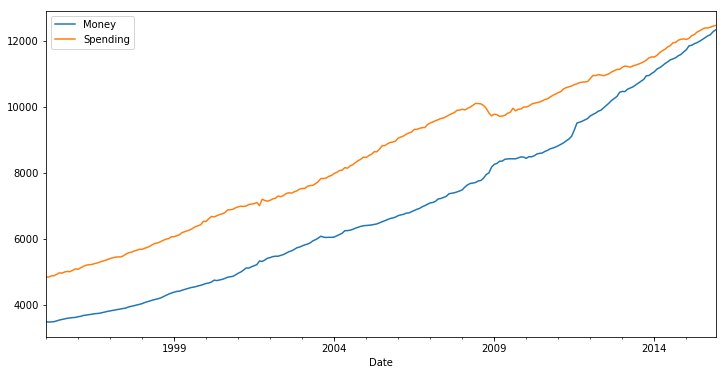

In [11]:
df.plot(figsize=(12,6)).autoscale(axis='x',tight=True)

- They kinda seem to converge at the end

- next step is to check for stationarity and perform any transformations
- And transformation is simply differencing the dataset.

In [12]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

- lets go ahead and run this on our columns of the dataframe

In [13]:
adf_test(df['Money'])

Augmented Dickey-Fuller Test: 
ADF test statistic        4.239022
p-value                   1.000000
# lags used               4.000000
# observations          247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [14]:
adf_test(df['Spending'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.149796
p-value                   0.969301
# lags used               3.000000
# observations          248.000000
critical value (1%)      -3.456996
critical value (5%)      -2.873266
critical value (10%)     -2.573019
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


- Both are non-stationary
- So, we need to difference both columns 

- To start off, we are gonna take a first order difference of the entire dataframe.
- And if we are dealing with entire dataframe(and not a single series of information), luckily pandas has a difference method available off a data frame
- Which is "df.diff"

In [15]:
df_transformed=df.diff()

- Now, I have two dataframe
    - One is original one
    - Another is transformed one

In [16]:
df

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1
1995-06-01,3548.9,4977.5
1995-07-01,3567.4,4970.2
1995-08-01,3589.0,5005.3
1995-09-01,3602.1,5020.5


In [17]:
df_transformed

,Money,Spending
Date,,
1995-01-01,NaN,NaN
1995-02-01,-2.5,-0.4
1995-03-01,1.2,34.6
1995-04-01,8.1,4.8
1995-05-01,25.0,42.9
1995-06-01,24.7,44.4
1995-07-01,18.5,-7.3
1995-08-01,21.6,35.1
1995-09-01,13.1,15.2


- Now, lets check again if it is stationary

In [18]:
adf_test(df_transformed['Money'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -2.057404
p-value                   0.261984
# lags used              15.000000
# observations          235.000000
critical value (1%)      -3.458487
critical value (5%)      -2.873919
critical value (10%)     -2.573367
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


' Money ' column is non-stationary

In [19]:
adf_test(df_transformed['Spending'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.226974e+00
p-value                 2.041027e-10
# lags used             2.000000e+00
# observations          2.480000e+02
critical value (1%)    -3.456996e+00
critical value (5%)    -2.873266e+00
critical value (10%)   -2.573019e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


'Spending' column is stationary

- Now, since 'Money' column is still non-stationary, we have to call a second order differencing to both series 
    - We can do that by simply calling .diff() of the df_transformed
- Point to keep in mind that I wanna make sure when I am running my vector autoregression that I have the same number of available rows 
- And every time we are differencing, we are loosing one top row of the data
- So applying 2nd order differencing to only 'Money' column will result in less number of rows in one 
- And later we will undo the differencing 

In [20]:
df_transformed = df_transformed.diff().dropna()

In [21]:
df_transformed.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


- Now lets check again if 'Money' is  non-stationary or not

In [22]:
adf_test(df_transformed['Money'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.077471e+00
p-value                 4.760675e-10
# lags used             1.400000e+01
# observations          2.350000e+02
critical value (1%)    -3.458487e+00
critical value (5%)    -2.873919e+00
critical value (10%)   -2.573367e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [23]:
adf_test(df_transformed['Spending'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -8.760145e+00
p-value                 2.687900e-14
# lags used             8.000000e+00
# observations          2.410000e+02
critical value (1%)    -3.457779e+00
critical value (5%)    -2.873609e+00
critical value (10%)   -2.573202e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


- SO, NOW BOTH COLUMNS ARE STATIONARY

In [24]:
df_transformed.shape

(250, 2)

# Train test split
- Gonna use 12 months as our test data

- Lets try doing this with a variable technique

In [25]:
# Num of observations
nobs = 12

# We are using it because its easy to handle when we want to change the number of observations

In [26]:
train=df_transformed[:-nobs]   # start = beginning of df ---> -12 from the end

In [27]:
test=df_transformed[-nobs:]

In [28]:
test

,Money,Spending
Date,,
2015-01-01,-15.5,-26.6
2015-02-01,56.1,52.4
2015-03-01,-102.8,39.5
2015-04-01,30.9,-40.4
2015-05-01,-15.8,38.8
2015-06-01,14.0,-34.1
2015-07-01,6.7,6.9
2015-08-01,-0.7,-8.5
2015-09-01,5.5,-39.8


# Now, lets choose the order of our VAR model
# Going to perform a grid search for order p for AR component of VAR

- Sadly auto_arima doesn't work for VAR,but only for seasonal ARIMA and seasonal ARIMA exogenous 

In [29]:
model = VAR(train)

for p in [1,2,3,4,5,6,7]: #range(8)
    results = model.fit(p)    #'p' is the main parameter for VAR model
    print(f'ORDER {p}')
    print(f'AIC: {results.aic}')
    print('\n')
    
    # So for each p values, I will fit the model, using  that order of p, and then report back our order and aic.
    # And then, we will choose the one with the lowest AIC 

ORDER 1
AIC: 14.178610495220896


ORDER 2
AIC: 13.955189367163705


ORDER 3
AIC: 13.849518291541038


ORDER 4
AIC: 13.827950574458281


ORDER 5
AIC: 13.78730034460964


ORDER 6
AIC: 13.799076756885807


ORDER 7
AIC: 13.797638727913972




- HERE, WE NOTICED THAT AIC BEGAN TO DROP AS WE GET MORE COMPLEX MODELS, WHICH ARE FITTING THE DATA BETTER
- THEN, AFTER A CERTAIN AMOUNT OF TIME, AIC BEGIN TO INCREASE AGAIN 
- SO, WE KINDA WANNA GO WITH p=5(order = 5) 

In [30]:
results = model.fit(5)

In [31]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 13, Jun, 2021
Time:                     12:27:08
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

- Above, since we have k=2, we got two time series, 
    - One for money
    - One for spending

# Lets go ahead and predict the next 12 values

- All right, now, the way we're actually going to grab these forecasted values is going to be slightly more complicated 

# 'results.forecast' Produce linear minimum MSE forecasts for desired number of steps ahead, using prior values y

# 'self' parameter in 'results.forecast()' is int type, in our case its 12

# 'y' parameter is a bit complicated:
#     First, it needs to be an numpy array, we cant pass it as a data frame
#     We have to call .values off the pandas dataframe to get the actual numpy array
#     In 'y:ndarray(p x k)', p is the actual lag order, which is 5 in our case
#     And k is a number of time series terms, which is 2(Money, Spending) in our case
#     So, we need a 5*2 numpy array 
#     Essentially it is asking for is to give 5 lagged values right before the test set starts 

In [33]:
# Grab 5 lagged values, right before the test starts!
# And we need these in terms of numpy Array


In [35]:
train.values    # this is just an attribute that returns back a data frame in the forms of a numpy array


array([[ 3.700e+00,  3.500e+01],
       [ 6.900e+00, -2.980e+01],
       [ 1.690e+01,  3.810e+01],
       [-3.000e-01,  1.500e+00],
       [-6.200e+00, -5.170e+01],
       [ 3.100e+00,  4.240e+01],
       [-8.500e+00, -1.990e+01],
       [-1.800e+00, -2.180e+01],
       [-4.800e+00,  4.830e+01],
       [ 3.100e+00,  2.000e-01],
       [ 8.800e+00, -5.370e+01],
       [-4.400e+00,  5.890e+01],
       [ 1.110e+01, -6.600e+00],
       [-1.430e+01, -5.800e+00],
       [ 1.100e+00, -1.890e+01],
       [ 1.100e+00, -9.800e+00],
       [ 1.600e+00,  1.610e+01],
       [-7.600e+00,  1.000e+00],
       [ 2.400e+00, -1.500e+00],
       [ 7.900e+00,  1.030e+01],
       [ 1.900e+00, -9.200e+00],
       [ 1.100e+00,  4.700e+00],
       [-6.000e+00,  5.100e+00],
       [-2.700e+00, -9.600e+00],
       [ 3.300e+00, -2.700e+00],
       [ 1.200e+00, -1.510e+01],
       [-4.300e+00, -4.200e+00],
       [ 5.000e+00,  3.310e+01],
       [ 1.100e+00,  2.060e+01],
       [ 1.570e+01, -1.640e+01],
       [-1

In [36]:
train.values.shape

(238, 2)

- We here see that we have 238 rows
- We actually needs last 5 values of the training set which is right before the test set starts

In [40]:
lagged_values = train.values[-5:]

In [42]:
z=results.forecast(y=lagged_values,steps=12) 

- the forecast returns back the forecasted values for money and spending 
- Above is still in terms of second order difference 

In [43]:
z 

array([[-16.99527634,  36.14982003],
       [ -3.17403756, -11.45029844],
       [ -0.377725  ,  -6.68496939],
       [ -2.60223305,   5.47945777],
       [  4.228557  ,  -2.44336505],
       [  1.55939341,   0.38763902],
       [ -0.99841027,   3.88368011],
       [  0.36451042,  -2.3561014 ],
       [ -1.21062726,  -1.22414652],
       [  0.22587712,   0.786927  ],
       [  1.33893884,   0.18097449],
       [ -0.21858453,   0.21275046]])

- Lets first transform it back to dataframe from numpy values

In [44]:
test

,Money,Spending
Date,,
2015-01-01,-15.5,-26.6
2015-02-01,56.1,52.4
2015-03-01,-102.8,39.5
2015-04-01,30.9,-40.4
2015-05-01,-15.8,38.8
2015-06-01,14.0,-34.1
2015-07-01,6.7,6.9
2015-08-01,-0.7,-8.5
2015-09-01,5.5,-39.8


In [45]:
idx = pd.date_range('2015-01-01',periods=12,freq='MS')

# We picked the date here where he test set starts

In [46]:
idx

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', freq='MS')

- Now build a dataframe
- And this will the dataframe for my forecast into that test set

In [47]:
df_forecast = pd.DataFrame(data=z,index=idx,columns=['Money_2d','Spending_2d'])

In [48]:
df_forecast

,Money_2d,Spending_2d
2015-01-01,-16.995276,36.149820
2015-02-01,-3.174038,-11.450298
2015-03-01,-0.377725,-6.684969
2015-04-01,-2.602233,5.479458
2015-05-01,4.228557,-2.443365
2015-06-01,1.559393,0.387639
2015-07-01,-0.998410,3.883680
2015-08-01,0.364510,-2.356101
2015-09-01,-1.210627,-1.224147
2015-10-01,0.225877,0.786927


# Now we gotta undo the second order differencing
- We will first reverse the first difference and then reverse the second difference

In [54]:
df.tail(15)

,Money,Spending
Date,,
2014-10-01,11552.4,12023.0
2014-11-01,11591.5,12051.4
2014-12-01,11670.1,12062.0
2015-01-01,11733.2,12046.0
2015-02-01,11852.4,12082.4
2015-03-01,11868.8,12158.3
2015-04-01,11916.1,12193.8
2015-05-01,11947.6,12268.1
2015-06-01,11993.1,12308.3


In [59]:
(df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money_2d'].cumsum()

2015-01-01    61.604724
2015-02-01    58.430686
2015-03-01    58.052961
2015-04-01    55.450728
2015-05-01    59.679285
2015-06-01    61.238678
2015-07-01    60.240268
2015-08-01    60.604779
2015-09-01    59.394151
2015-10-01    59.620028
2015-11-01    60.958967
2015-12-01    60.740383
Freq: MS, Name: Money_2d, dtype: float64

In [58]:
df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]

78.60000000000036

In [55]:
df_forecast['Money_2d'].cumsum()

2015-01-01   -16.995276
2015-02-01   -20.169314
2015-03-01   -20.547039
2015-04-01   -23.149272
2015-05-01   -18.920715
2015-06-01   -17.361322
2015-07-01   -18.359732
2015-08-01   -17.995221
2015-09-01   -19.205849
2015-10-01   -18.979972
2015-11-01   -17.641033
2015-12-01   -17.859617
Freq: MS, Name: Money_2d, dtype: float64

- Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
- What we do, is that off the Money_2d, I take the cummulative sum and then I take that value and I add it to recent first difference from the training side
- And then, We build the forecast values from the first difference set

In [49]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money_2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money1d'].cumsum()

In [51]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending_2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending1d'].cumsum()

In [52]:
df_forecast

,Money_2d,Spending_2d,Money1d,MoneyForecast,Spending1d,SpendingForecast
2015-01-01,-16.995276,36.149820,61.604724,11731.704724,46.749820,12108.749820
2015-02-01,-3.174038,-11.450298,58.430686,11790.135410,35.299522,12144.049342
2015-03-01,-0.377725,-6.684969,58.052961,11848.188371,28.614552,12172.663894
2015-04-01,-2.602233,5.479458,55.450728,11903.639099,34.094010,12206.757904
2015-05-01,4.228557,-2.443365,59.679285,11963.318384,31.650645,12238.408549
2015-06-01,1.559393,0.387639,61.238678,12024.557062,32.038284,12270.446833
2015-07-01,-0.998410,3.883680,60.240268,12084.797331,35.921964,12306.368797
2015-08-01,0.364510,-2.356101,60.604779,12145.402109,33.565863,12339.934659
2015-09-01,-1.210627,-1.224147,59.394151,12204.796261,32.341716,12372.276375
2015-10-01,0.225877,0.786927,59.620028,12264.416289,33.128643,12405.405019


In [60]:
test_range = df[-nobs:]

In [61]:
test_range

,Money,Spending
Date,,
2015-01-01,11733.2,12046.0
2015-02-01,11852.4,12082.4
2015-03-01,11868.8,12158.3
2015-04-01,11916.1,12193.8
2015-05-01,11947.6,12268.1
2015-06-01,11993.1,12308.3
2015-07-01,12045.3,12355.4
2015-08-01,12096.8,12394.0
2015-09-01,12153.8,12392.8


- Now lets plot out the test_range and forecasted values

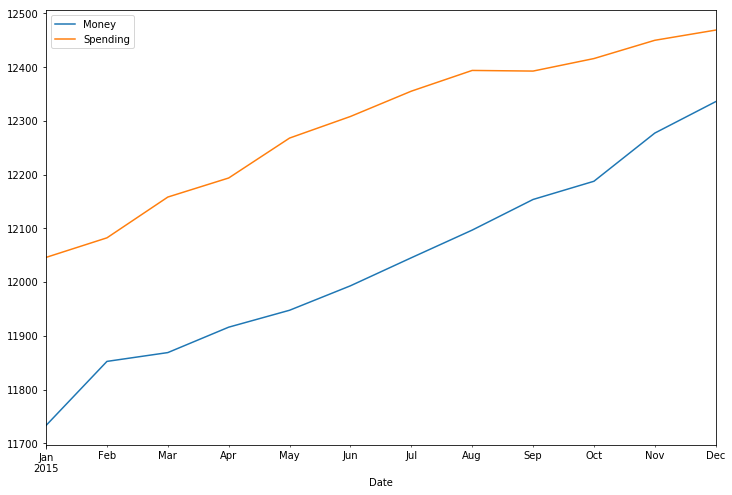

In [63]:
test_range.plot(figsize=(12,8)).autoscale(axis='x',tight=True)

In [64]:
df_forecast.columns

Index(['Money_2d', 'Spending_2d', 'Money1d', 'MoneyForecast', 'Spending1d',
       'SpendingForecast'],
      dtype='object')

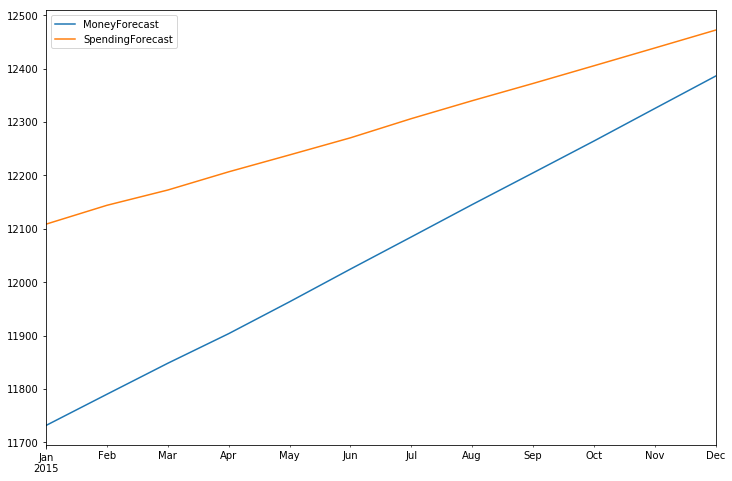

In [66]:
df_forecast[['MoneyForecast','SpendingForecast']].plot(figsize=(12,8)).autoscale(axis='x',tight=True)

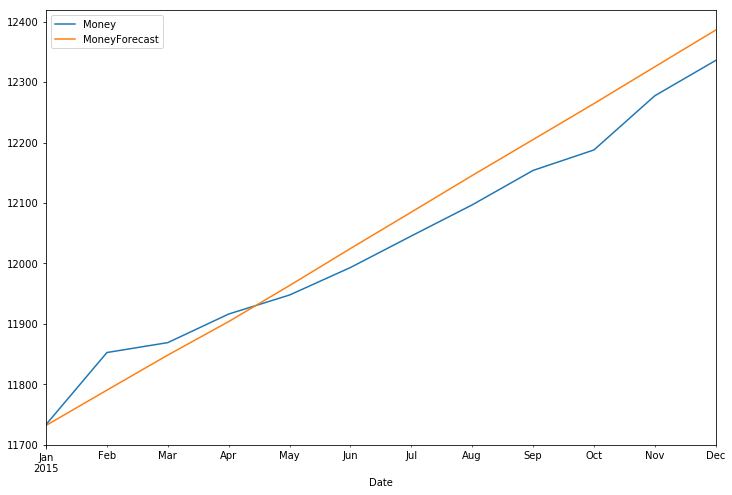

In [69]:
test_range['Money'].plot(legend=True, figsize=(12,8)).autoscale(axis='x',tight=True)
df_forecast['MoneyForecast'].plot(legend=True).autoscale(axis='x',tight=True)

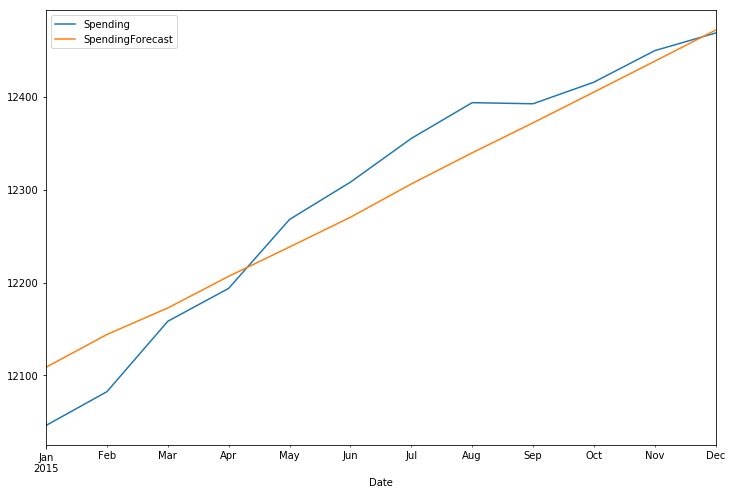

In [70]:
test_range['Spending'].plot(legend=True, figsize=(12,8)).autoscale(axis='x',tight=True)
df_forecast['SpendingForecast'].plot(legend=True).autoscale(axis='x',tight=True)

In [71]:
# now, lets evaluate this model by using rmse 
rmse(test_range['Money'],df_forecast['MoneyForecast'])

43.71049653558893

In [72]:
test_range['Money'].mean()

12034.008333333333

In [73]:
rmse(test_range['Spending'],df_forecast['SpendingForecast'])

37.001175169408086

In [74]:
test_range['Spending'].mean()

12294.533333333335